In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare the Data

In [2]:
# Read the data
ratings_df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_3/datasets/ratings.txt",
                         sep=" ",
                         header=None,
                         names=["user_id", "movie_id", "rating"])
ratings_df

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [3]:
# Remove duplicates on user_id and movie_id, keeping the last row
ratings_df = ratings_df.drop_duplicates(subset=["user_id", "movie_id"], keep="last")
ratings_df

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [4]:
# Pivot the DataFrame and fill NAs
ratings_matrix = ratings_df.pivot(index="user_id", columns="movie_id", values="rating").fillna(0)
ratings_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,4.0,3.5,3.0,4.0,3.5,3.5,3.0,2.5,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,3.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1505,4.0,3.0,2.0,3.0,4.0,0.0,4.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Create variable for normalization
# Ratings are between 0-5
normalization_factor = 5

# Normalize the ratings
normalized_ratings = ratings_matrix / normalization_factor
normalized_ratings

movie_id,1,2,3,4,5,6,7,8,9,10,...,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.4,0.8,0.7,0.6,0.8,0.7,0.7,0.6,0.5,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.6,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,0.6,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6
1505,0.8,0.6,0.4,0.6,0.8,0.0,0.8,0.6,0.8,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train = normalized_ratings.values
X_train

array([[0.4, 0.8, 0.7, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.8, 0. , ..., 0. , 0. , 0. ],
       [0.3, 0.6, 0.4, ..., 0. , 0. , 0. ]])

## Train the Model

In [7]:
# Set the number of neurons for the layers
hiddenUnits = 20
visibleUnits =  len(ratings_matrix.columns)

# Set the bias of the visible layer to 0. This should use the number of unique movies.
visible_layer_bias = tf.Variable(tf.zeros([visibleUnits]), tf.float32)

# Set the bias of the hidden layer to 0. This will use hiddenUnits, which is
# the number of features we're going to learn
hidden_layer_bias = tf.Variable(tf.zeros([hiddenUnits]), tf.float32)

# Set the Weights to 0
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [8]:
v0 = tf.zeros([visibleUnits], tf.float32)
# testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [9]:
# Phase 1: Input Processing
# Define a function to return only the generated hidden states
def hidden_layer(v0_state, W, hb):
    # probabilities of the hidden units
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)
    # sample_h_given_X
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
    return h0_state

# Print output of zeros input
h0 = hidden_layer(v0, W, hidden_layer_bias)
print("first 15 hidden states: ", h0[0][0:15])

# Define a function to return the reconstructed output
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb)
    # sample_v_given_h
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
    return v1_state[0]

# Get reconstructed output from zeros input
v1 = reconstructed_output(h0, W, visible_layer_bias)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (2071,)
v1 state shape:   (2071,)


In [10]:
# Set the error function, which in this case will be the Mean Absolute Error Function.
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.4958957


Epoch: 1 batch #: 0  of 7 sample #: 199 reconstruction error: 0.013694
Epoch: 1 batch #: 1  of 7 sample #: 199 reconstruction error: 0.005311
Epoch: 1 batch #: 2  of 7 sample #: 199 reconstruction error: 0.003882
Epoch: 1 batch #: 3  of 7 sample #: 199 reconstruction error: 0.008542
Epoch: 1 batch #: 4  of 7 sample #: 199 reconstruction error: 0.008986
Epoch: 1 batch #: 5  of 7 sample #: 199 reconstruction error: 0.010715
Epoch: 1 batch #: 6  of 7 sample #: 199 reconstruction error: 0.002168
Epoch: 1 batch #: 7  of 7 sample #: 107 reconstruction error: 0.007991
Epoch: 2 batch #: 0  of 7 sample #: 199 reconstruction error: 0.017364
Epoch: 2 batch #: 1  of 7 sample #: 199 reconstruction error: 0.000966
Epoch: 2 batch #: 2  of 7 sample #: 199 reconstruction error: 0.004365
Epoch: 2 batch #: 3  of 7 sample #: 199 reconstruction error: 0.006610
Epoch: 2 batch #: 4  of 7 sample #: 199 reconstruction error: 0.008986
Epoch: 2 batch #: 5  of 7 sample #: 199 reconstruction error: 0.008880
Epoch:

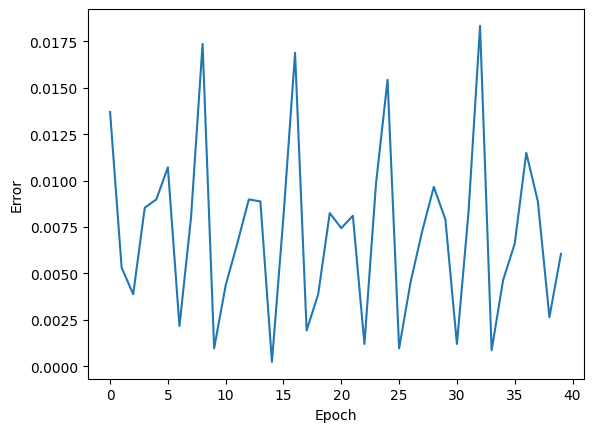

In [11]:
# Set the training variables
epochs = 5
batchsize = 200
errors = []
weights = []
K=1
alpha = 0.1

# Create dataset batches
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(X_train))).batch(batchsize)



v0_state=v0

# Train the model
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hidden_layer_bias)
                v1_state = reconstructed_output(h0_state, W, visible_layer_bias)
                h1_state = hidden_layer(v1_state, W, hidden_layer_bias)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)

                # Update weights
                W = W + alpha * delta_W

                # Update biases
                visible_layer_bias = visible_layer_bias + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hidden_layer_bias = hidden_layer_bias + alpha * tf.reduce_mean(h0_state - h1_state, 0)

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1),
                       "batch #: %i " % batch_number, "of %i" % (len(X_train)/batchsize),
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1

# Plot the errors
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

## Save Model

In [12]:
# Collect the weights and biases so we can rebuild the model without re-training
print("Weights: ", W)
print("Hidden Layer Biases: ", hidden_layer_bias)
print("Visible Layer Biases: ", visible_layer_bias)

Weights:  tf.Tensor(
[[-5.19997358e-01  7.00027421e-02  4.09781933e-06 ... -2.29998142e-01
  -4.79996920e-01 -7.09995925e-01]
 [-1.98999727e+00 -8.90005946e-01 -4.79997694e-01 ... -1.19994745e-01
  -1.50999618e+00 -1.19993724e-01]
 [-8.99997771e-01 -2.80000836e-01 -3.29995990e-01 ... -1.50000185e-01
  -6.29997253e-01 -2.29996502e-01]
 ...
 [-3.49999994e-01 -5.49999952e-01 -5.50000012e-01 ... -5.49999952e-01
  -4.49999988e-01 -4.49999988e-01]
 [-4.39999998e-01 -2.99999982e-01 -2.19999999e-01 ... -9.99999940e-02
  -3.19999993e-01 -3.19999993e-01]
 [-4.80000019e-01 -2.99999982e-01 -5.60000002e-01 ... -2.40000010e-01
  -3.79999995e-01 -4.19999987e-01]], shape=(2071, 20), dtype=float32)
Hidden Layer Biases:  tf.Tensor(
[-0.9999999  18.100033    2.0000005  -0.9999999   0.9000002   7.3999953
  1.4000003  12.00001    12.20001    10.900005    5.1999974   5.8999968
 10.100002    1.7000004  -1.4        11.300007    2.5         5.0999975
 -0.29999986  0.8000002 ], shape=(20,), dtype=float32)
Visib

In [13]:
# Convert the weights into a Pandas DataFrame
weight_settings = pd.DataFrame(data=W.numpy())

# Save weights to CSV
weight_settings.to_csv("rbm_weights.csv", index=False)

In [14]:
# Convert the biases to Pandas DataFrame and export to CSVs
hidden_bias_settings = pd.DataFrame(data=hidden_layer_bias.numpy())
hidden_bias_settings.to_csv("hidden_layer_bias.csv", index=False)
visible_bias_settings = pd.DataFrame(visible_layer_bias.numpy())
visible_bias_settings.to_csv("visible_layer_bias.csv", index=False)

## Retrieve Model

In [15]:
# Read weights and convert back to Tensor
weight_settings = pd.read_csv("rbm_weights.csv")
weights_tensor = tf.constant(weight_settings.values, tf.float32)
weights_tensor

<tf.Tensor: shape=(2071, 20), dtype=float32, numpy=
array([[-5.19997358e-01,  7.00027421e-02,  4.09781933e-06, ...,
        -2.29998142e-01, -4.79996920e-01, -7.09995925e-01],
       [-1.98999727e+00, -8.90005946e-01, -4.79997694e-01, ...,
        -1.19994745e-01, -1.50999618e+00, -1.19993724e-01],
       [-8.99997771e-01, -2.80000836e-01, -3.29995990e-01, ...,
        -1.50000185e-01, -6.29997253e-01, -2.29996502e-01],
       ...,
       [-3.49999994e-01, -5.49999952e-01, -5.50000012e-01, ...,
        -5.49999952e-01, -4.49999988e-01, -4.49999988e-01],
       [-4.39999998e-01, -2.99999982e-01, -2.19999999e-01, ...,
        -9.99999940e-02, -3.19999993e-01, -3.19999993e-01],
       [-4.80000019e-01, -2.99999982e-01, -5.60000002e-01, ...,
        -2.40000010e-01, -3.79999995e-01, -4.19999987e-01]], dtype=float32)>

In [16]:
# Read hidden layer biases and convert back to Tensor
hidden_bias_settings = pd.read_csv("hidden_layer_bias.csv")
hidden_tensor = tf.constant(hidden_bias_settings.values, tf.float32)
hidden_tensor

<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
array([[-0.9999999 ],
       [18.100033  ],
       [ 2.0000005 ],
       [-0.9999999 ],
       [ 0.9000002 ],
       [ 7.3999953 ],
       [ 1.4000003 ],
       [12.00001   ],
       [12.20001   ],
       [10.900005  ],
       [ 5.1999974 ],
       [ 5.8999968 ],
       [10.100002  ],
       [ 1.7000004 ],
       [-1.4       ],
       [11.300007  ],
       [ 2.5       ],
       [ 5.0999975 ],
       [-0.29999986],
       [ 0.8000002 ]], dtype=float32)>

In [17]:
# Read visible layer biases and convert back to Tensor
visible_bias_settings = pd.read_csv("visible_layer_bias.csv")
visible_tensor = tf.constant(visible_bias_settings.values, tf.float32)
visible_tensor

<tf.Tensor: shape=(2071, 1), dtype=float32, numpy=
array([[-2.374415],
       [-2.374415],
       [-2.374415],
       ...,
       [-2.374415],
       [-2.374415],
       [-2.374415]], dtype=float32)>

## Test Model Recommendations

In [18]:
# Create a function to reconstruct ratings data
def get_user_recommendations(user_id):
    inputUser = tf.convert_to_tensor(normalized_ratings.loc[user_id].values,"float32")
    v0 = inputUser

    hh0 = tf.nn.sigmoid(tf.matmul([v0], weights_tensor) + hidden_tensor)

    vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(weights_tensor)) + tf.transpose(visible_tensor))

    rec = vv1
    return rec

In [19]:
# Test recommendation
test_user = 1024

recommendation = get_user_recommendations(test_user)
recommendation

<tf.Tensor: shape=(20, 2071), dtype=float32, numpy=
array([[5.8781201e-01, 8.6219490e-01, 5.7487786e-01, ..., 1.4818205e-03,
        2.3970227e-03, 1.5793790e-03],
       [3.1731062e-02, 6.0230456e-03, 6.0295977e-02, ..., 2.0181418e-05,
        1.5199462e-04, 2.3778486e-05],
       [5.7747400e-01, 8.1982476e-01, 4.4167322e-01, ..., 7.5560546e-04,
        1.6011512e-03, 8.0557610e-04],
       ...,
       [3.2248214e-01, 6.3926393e-01, 3.7046230e-01, ..., 3.5313549e-04,
        9.2622865e-04, 3.5086350e-04],
       [5.9520173e-01, 8.5400349e-01, 5.4541826e-01, ..., 1.2273063e-03,
        2.1480292e-03, 1.3045918e-03],
       [5.9836310e-01, 8.3956444e-01, 4.8917046e-01, ..., 9.4881607e-04,
        1.8479158e-03, 1.0111975e-03]], dtype=float32)>

In [20]:
# Convert recommendation to DataFrame

rec_df = pd.DataFrame({"movie_id": ratings_matrix.columns, "user_id": test_user})
rec_df = rec_df.assign(RecommendationScore = recommendation[0])

# Sort recommendations
rec_df.sort_values(["RecommendationScore"], ascending=False).head(20)

,movie_id,user_id,RecommendationScore
213,214,1024,0.882422
214,215,1024,0.870703
205,206,1024,0.863533
1,2,1024,0.862195
12,13,1024,0.831578
218,219,1024,0.818456
253,254,1024,0.812419
8,9,1024,0.780538
252,253,1024,0.777095
238,239,1024,0.766991


In [21]:
# Merge recommendation scores with original dataset ratings
merged_df = rec_df.merge(ratings_df, on=['movie_id', 'user_id'], how='outer')
merged_df.sort_values(["RecommendationScore"], ascending=False).head(20)

,movie_id,user_id,RecommendationScore,rating
213,214,1024,0.882422,3.5
214,215,1024,0.870703,4.0
205,206,1024,0.863533,2.0
1,2,1024,0.862195,3.0
12,13,1024,0.831578,3.5
218,219,1024,0.818456,NaN
253,254,1024,0.812419,4.0
8,9,1024,0.780538,3.0
252,253,1024,0.777095,2.0
238,239,1024,0.766991,1.5
